In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random as rnd
import seaborn as sns

In [2]:
relative_path = os.path.abspath("")
original_data_train_path = os.path.join(relative_path, "original_data", "train", "train")
original_data_test_path = os.path.join(relative_path, "original_data", "test", "test")

print(f"{relative_path=}")
print(f"{original_data_train_path=}")

relative_path='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab'
original_data_train_path='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/original_data/train/train'


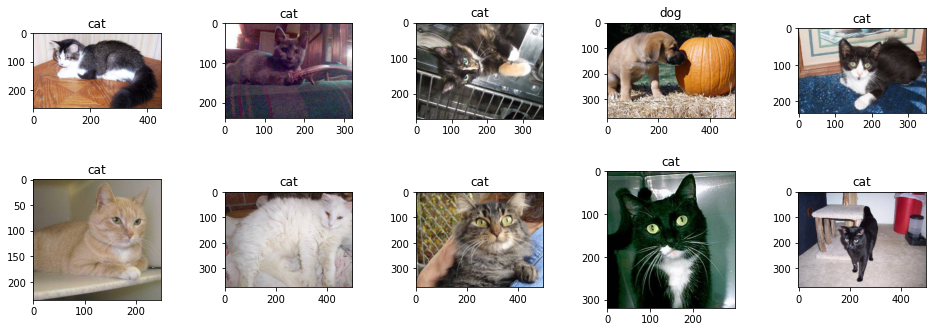

In [3]:
rnd.seed(42)

image_names = os.listdir(original_data_train_path)

fig, axes = plt.subplots(2, 5, figsize = (16, 8))

for ax, image_name in zip(axes.flatten(), rnd.sample(image_names, 10)):
    image = plt.imread(f"{original_data_train_path}{os.sep}{image_name}")
    ax.imshow(image)
    ax.set_title(image_name.split(".")[0])

plt.subplots_adjust(wspace = 0.5, hspace = -0.5, bottom = 0)
plt.show()

In [4]:
parents = ["experiment_small_data", "experiment_tiny_data"]
children = ["train", "val", "test"]

for parent in parents:
    try:
        os.mkdir(f"{relative_path}{os.sep}{parent}")
    except FileExistsError as err:
        print(err)
    for child in children:
        try:
            os.mkdir(f"{relative_path}{os.sep}{parent}{os.sep}{child}")
        except FileExistsError as err:
            print(err)

[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data/train'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data/val'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_small_data/test'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data/train'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data/val'
[Errno 17] File exists: '/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/experiment_tiny_data/test'


In [5]:
import shutil

def get_label(filename):
    return filename.split(".")[0]

def get_cats_dogs(filenames, n):
    cats, dogs = [], []
    files_to_move = []

    for filename in filenames:
        if get_label(filename) == "cat":
            cats.append(filename)
        else:
            dogs.append(filename)
    
    files_to_move += rnd.sample(dogs, n // 2) + rnd.sample(cats, n // 2)

    return files_to_move


def move_files(filenames, n, source, target):
    files_to_move = get_cats_dogs(filenames, n)

    for filename in files_to_move:
        shutil.copy(f"{source}{os.sep}{filename}", f"{target}{os.sep}{filename}")

    for filename in files_to_move:
        filenames.remove(filename)

    return filenames

train_images_list = os.listdir(original_data_train_path)

number_of_files = [1600, 400, 500, 160, 40, 50]
targets = [f"{parent}{os.sep}{child}" for parent in parents for child in children]

for n, target in zip(number_of_files, targets):
        train_images_list = move_files(train_images_list, n, original_data_train_path, f"{relative_path}{os.sep}{target}")

for path in targets:
    print(f"Files in {path}: {len(os.listdir(path))}")


Files in experiment_small_data/train: 1600
Files in experiment_small_data/val: 400
Files in experiment_small_data/test: 500
Files in experiment_tiny_data/train: 160
Files in experiment_tiny_data/val: 40
Files in experiment_tiny_data/test: 50


In [43]:
rnd.seed(42)

images = {}
labels = {}

datasets = [target[11:].replace("_data/", "_") for target in targets]

for dataset, path in zip(datasets, targets):
    file_list = os.listdir(f"{relative_path}{os.sep}{path}")
    rnd.shuffle(file_list)
    images[dataset] = []
    labels[dataset] = []

    for file in file_list:
        images[dataset] += [plt.imread(f"{relative_path}{os.sep}{path}{os.sep}{file}")]
        labels[dataset] += [get_label(file)]
    
    labels[dataset] = np.array([1 if label == "cat" else 0 for label in labels[dataset]])

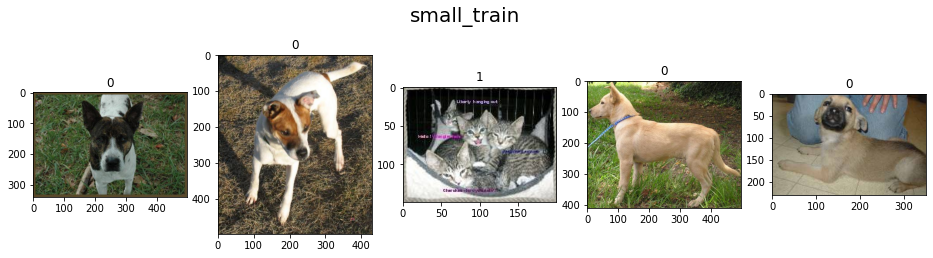

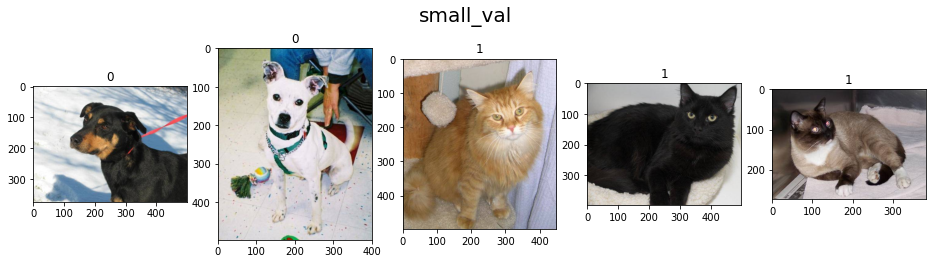

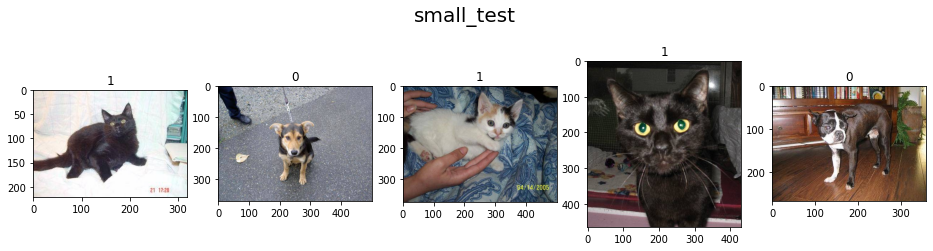

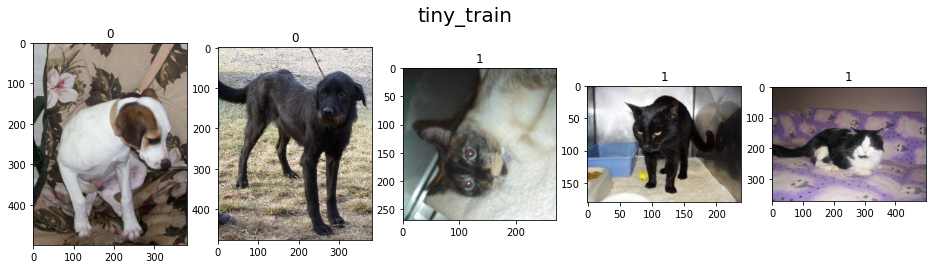

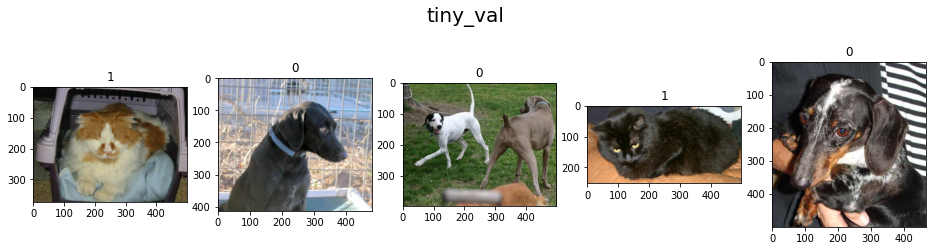

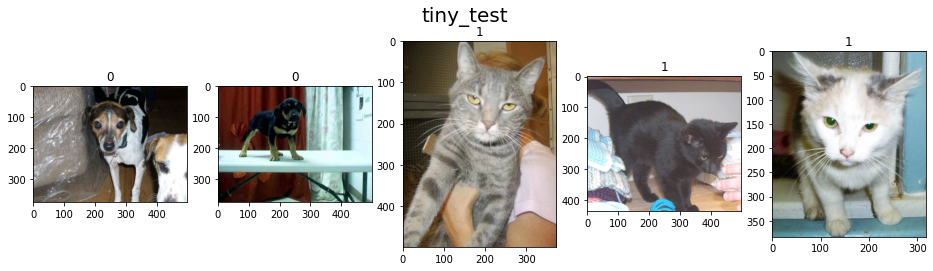

In [44]:
rnd.seed(42)

def plot_five_images(images, labels = None, suptitle = None):
    fig, axes = plt.subplots(1, 5, figsize = (16, 4))

    for i, (ax, image) in enumerate(zip(axes.flatten(), images[:5])):
        ax.imshow(image)

        if isinstance(labels, np.ndarray):
            ax.set_title(labels[i])
    
    if suptitle:
        fig.suptitle(suptitle, fontsize = 20)
    
    plt.show()

for dataset in datasets:
    plot_five_images(images[dataset], labels = labels[dataset], suptitle = dataset)

In [45]:
def balanced(labels, dataset):
    print(f"Dataset {dataset} balance: {np.sum(labels) / len(labels)}")

for dataset in datasets:
    balanced(labels[dataset], dataset)

Dataset small_train balance: 0.5
Dataset small_val balance: 0.5
Dataset small_test balance: 0.5
Dataset tiny_train balance: 0.5
Dataset tiny_val balance: 0.5
Dataset tiny_test balance: 0.5


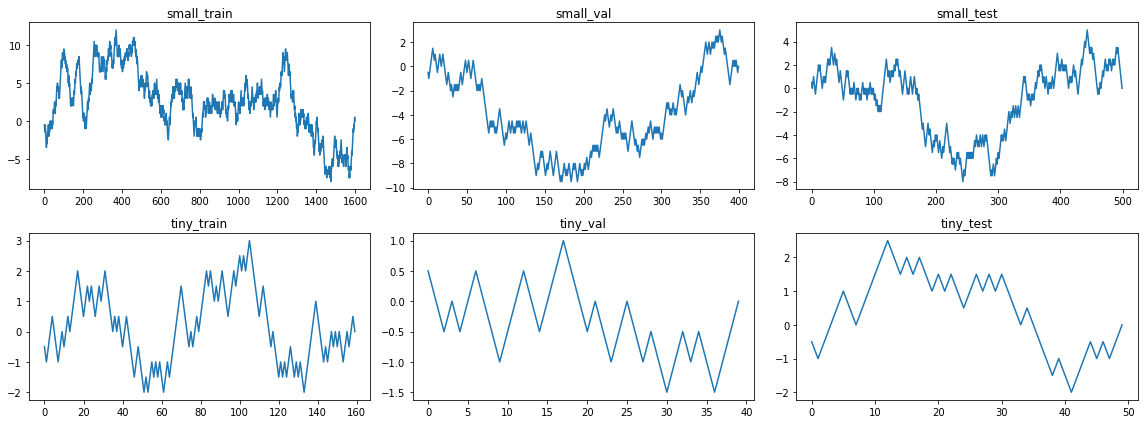

In [46]:
fig, axes = plt.subplots(2, len(datasets) // 2, figsize = (16, 6))

for ax, dataset in zip(axes.flatten(), datasets):
    ax.plot(np.cumsum(labels[dataset] - 0.5))
    ax.set_title(dataset)

fig.tight_layout()
plt.show()


In [47]:
datasets

['small_train',
 'small_val',
 'small_test',
 'tiny_train',
 'tiny_val',
 'tiny_test']

<AxesSubplot:ylabel='aspect_ratio'>

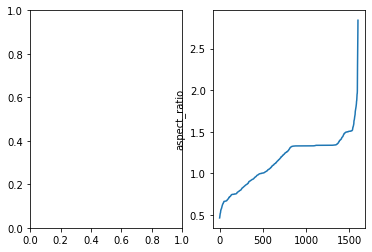

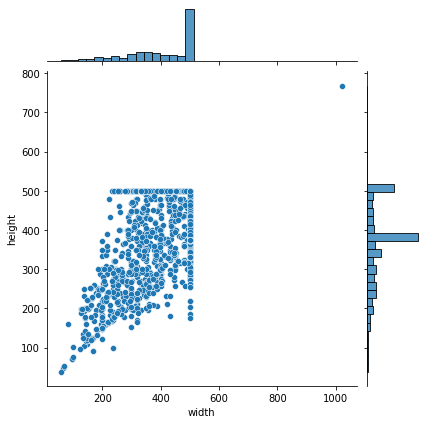

In [48]:
# [0] höjd, [1] bredd


image_heights = [image.shape[0] for image in images[datasets[0]]]
image_widths = [image.shape[1] for image in images[datasets[0]]]
image_labels = [label for label in labels[datasets[0]]]

df_dim = pd.DataFrame({"height": image_heights, "width": image_widths, "label": image_labels})

df_dim["aspect_ratio"] = df_dim["width"] / df_dim["height"]

fig, ax = plt.subplots(1, 2)
ax = ax.flatten()
sns.jointplot(data = df_dim, x = "width", y = "height", ax = ax[0])
sns.lineplot(data = df_dim.sort_values(by = "aspect_ratio").reset_index(), x = df_dim.index, y = "aspect_ratio", ax = ax[1])

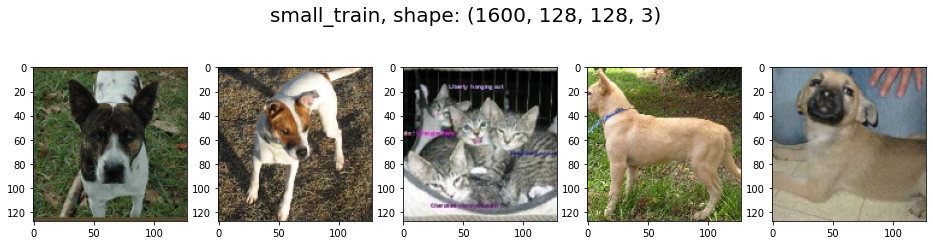

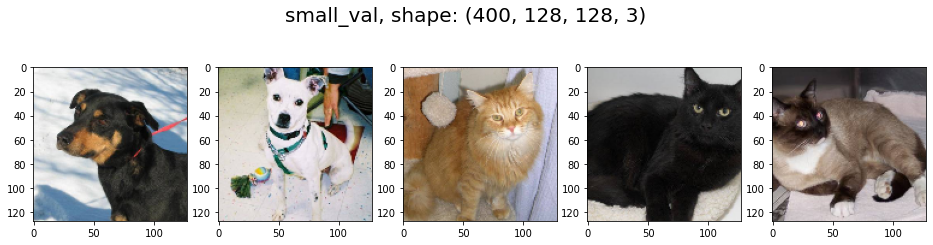

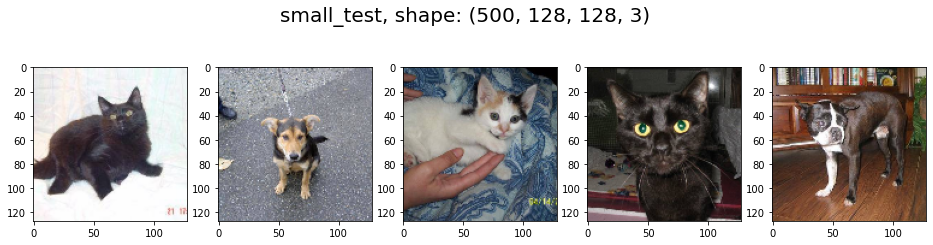

In [49]:
def square_image(image, side = None):
    height, width = image.shape[:2]
    
    if height < width and height + 1 < width:
        x = (width - height) // 2
        image = image[:,x:-x]
    elif height > width and height - 1 > width:
        y = (height - width) // 2
        image = image[y:-y,:]

    if side == None:
        return image
        
    return cv2.resize(image, (side, side))
    
sets = ['small_train', 'small_val', 'small_test']

for set in sets:
    for i, image in enumerate(images[set]):
        images[set][i] = square_image(images[set][i], side = 128)
    images[set] = np.array(images[set])
    plot_five_images(images[set][:5], suptitle = f"{set}, shape: {images[set].shape}")


In [50]:

X_train = images["small_train"].astype("float32") / 255
X_val = images["small_val"].astype("float32") / 255
X_test = images["small_test"].astype("float32") / 255
y_train = labels["small_train"]
y_val = labels["small_val"]
y_test = labels["small_test"]

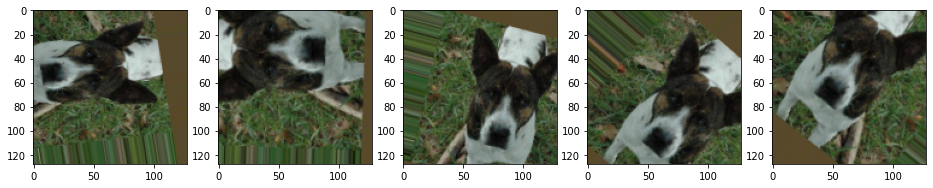

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
    rotation_range = 90,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = "nearest"
)

do_nothing_image_generator = ImageDataGenerator()

plot_generator = train_image_generator.flow(X_train[0:1], y_train[0:1], batch_size = 1)

plot_five_images([plot_generator.next()[0][0] for _ in range(5)])

train_generator = train_image_generator.flow(X_train, y_train, batch_size = 32)
val_generator = do_nothing_image_generator.flow(X_val, y_val, batch_size = 32)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

def CNN_model():
    model = Sequential(name = "cnn")

    conv_size = (3, 3)
    conv_kernels = [32, 64, 128, 128]
    conv_activation = "relu"

    for kernels in conv_kernels:
        model.add(Conv2D(
            kernels,
            kernel_size = conv_size,
            activation = conv_activation,
            kernel_initializer = "he_normal",
            input_shape = X_train.shape[1:]
        ))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
    
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(512, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ["acc"])

    return model

model = CNN_model()
model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)      0       

In [53]:
steps_per_epoch = int(len(X_train) / 32)
validation_steps = int(len(X_val) / 32)

steps_per_epoch, validation_steps

(50, 12)

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor = "val_acc", mode = "max", patience = 10, restore_best_weights = True)


In [55]:
"""
model.fit(
    X_train,
    y_train,
    #train_generator,
    #steps_per_epoch = steps_per_epoch,
    epochs = 25,
    callbacks = [early_stopper],
    validation_data = (X_val, y_val)
    #validation_data = val_generator,
    #validation_steps = validation_steps
)"""

'\nmodel.fit(\n    X_train,\n    y_train,\n    #train_generator,\n    #steps_per_epoch = steps_per_epoch,\n    epochs = 25,\n    callbacks = [early_stopper],\n    validation_data = (X_val, y_val)\n    #validation_data = val_generator,\n    #validation_steps = validation_steps\n)'

In [56]:
model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 200,
    #callbacks = [early_stopper],
    validation_data = val_generator,
    validation_steps = validation_steps
)

Epoch 1/200


2022-04-30 18:39:47.824009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 1.0198 - acc: 0.5006

2022-04-30 18:39:51.256246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 4s 70ms/step - loss: 1.0198 - acc: 0.5006 - val_loss: 0.6905 - val_acc: 0.5104
Epoch 2/200
50/50 [==============================] - 4s 71ms/step - loss: 0.6910 - acc: 0.5163 - val_loss: 0.6918 - val_acc: 0.4974
Epoch 3/200
50/50 [==============================] - 4s 70ms/step - loss: 0.6926 - acc: 0.5012 - val_loss: 0.6916 - val_acc: 0.4948
Epoch 4/200
50/50 [==============================] - 4s 72ms/step - loss: 0.6915 - acc: 0.5000 - val_loss: 0.6874 - val_acc: 0.5208
Epoch 5/200
50/50 [==============================] - 4s 72ms/step - loss: 0.6928 - acc: 0.4988 - val_loss: 0.6913 - val_acc: 0.5130
Epoch 6/200
50/50 [==============================] - 4s 71ms/step - loss: 0.6911 - acc: 0.5175 - val_loss: 0.6862 - val_acc: 0.5312
Epoch 7/200
50/50 [==============================] - 4s 73ms/step - loss: 0.6876 - acc: 0.5337 - val_loss: 0.6650 - val_acc: 0.5651
Epoch 8/200
50/50 [==============================] - 4s 71ms/step - loss: 0.6900 - acc: 

In [57]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize = (12, 4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], grid = True)

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

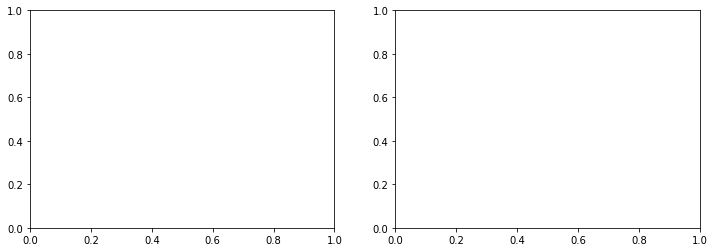

In [67]:
metrics = pd.DataFrame(model.history.history)
plot_metrics(metrics)

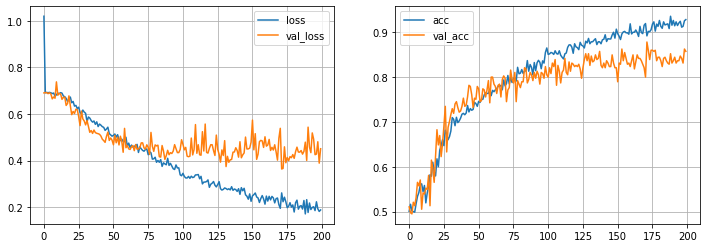

In [59]:
metrics = pd.DataFrame(model.history.history)
plot_metrics(metrics)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       250
           1       0.83      0.85      0.84       250

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



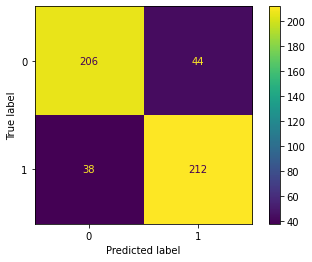

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) * 1

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

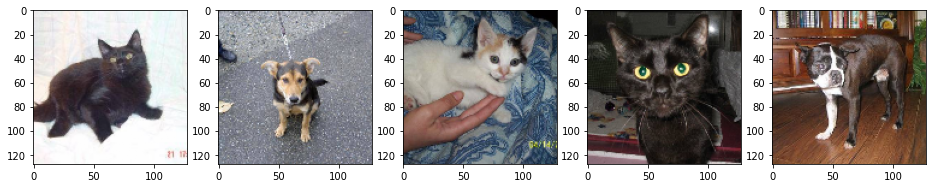

In [61]:
plot_five_images(X_test)

In [62]:
misclassified_indices = np.where(y_pred.ravel() != y_test)[0]
misclassified_samples = X_test[misclassified_indices]

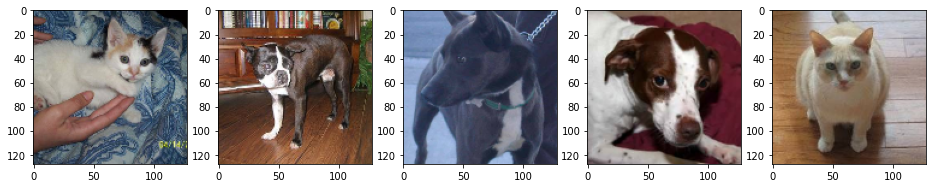

In [63]:
plot_five_images(misclassified_samples)

In [64]:
misclassified_indices.shape

(82,)

In [65]:
y_pred.shape

(500, 1)

In [66]:
y_test.shape

(500,)